In [383]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
import warnings
warnings.filterwarnings('ignore')

In [384]:
#READING THE DATA FROM DATASET
data=pd.read_csv('baseball.csv')
data.head()

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
0,95,724,5575,1497,300,42,139,383,973,104,641,601,3.73,2,8,56,88
1,83,696,5467,1349,277,44,156,439,1264,70,700,653,4.07,2,12,45,86
2,81,669,5439,1395,303,29,141,533,1157,86,640,584,3.67,11,10,38,79
3,76,622,5533,1381,260,27,136,404,1231,68,701,643,3.98,7,9,37,101
4,74,689,5605,1515,289,49,151,455,1259,83,803,746,4.64,7,12,35,86


In [385]:
data.shape

(30, 17)

In [386]:
data.describe()

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
count,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.00000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000
mean,80.966667,688.233333,5516.266667,1403.533333,274.733333,31.300000,163.633333,469.100000,1248.20000,83.500000,688.233333,635.833333,3.956333,3.466667,11.300000,43.066667,94.333333
std,10.453455,58.761754,70.467372,57.140923,18.095405,10.452355,31.823309,57.053725,103.75947,22.815225,72.108005,70.140786,0.454089,2.763473,4.120177,7.869335,13.958889
min,63.000000,573.000000,5385.000000,1324.000000,236.000000,13.000000,100.000000,375.000000,973.00000,44.000000,525.000000,478.000000,2.940000,0.000000,4.000000,28.000000,75.000000
25%,74.000000,651.250000,5464.000000,1363.000000,262.250000,23.000000,140.250000,428.250000,1157.50000,69.000000,636.250000,587.250000,3.682500,1.000000,9.000000,37.250000,86.000000
50%,81.000000,689.000000,5510.000000,1382.500000,275.500000,31.000000,158.500000,473.000000,1261.50000,83.500000,695.500000,644.500000,4.025000,3.000000,12.000000,42.000000,91.000000
75%,87.750000,718.250000,5570.000000,1451.500000,288.750000,39.000000,177.000000,501.250000,1311.50000,96.500000,732.500000,679.250000,4.220000,5.750000,13.000000,46.750000,96.750000
max,100.000000,891.000000,5649.000000,1515.000000,308.000000,49.000000,232.000000,570.000000,1518.00000,134.000000,844.000000,799.000000,5.040000,11.000000,21.000000,62.000000,126.000000


In [387]:
data.isna().sum()

W      0
R      0
AB     0
H      0
2B     0
3B     0
HR     0
BB     0
SO     0
SB     0
RA     0
ER     0
ERA    0
CG     0
SHO    0
SV     0
E      0
dtype: int64

In [388]:
#From above observation it is seen that there are no missing values and NaN present in data set

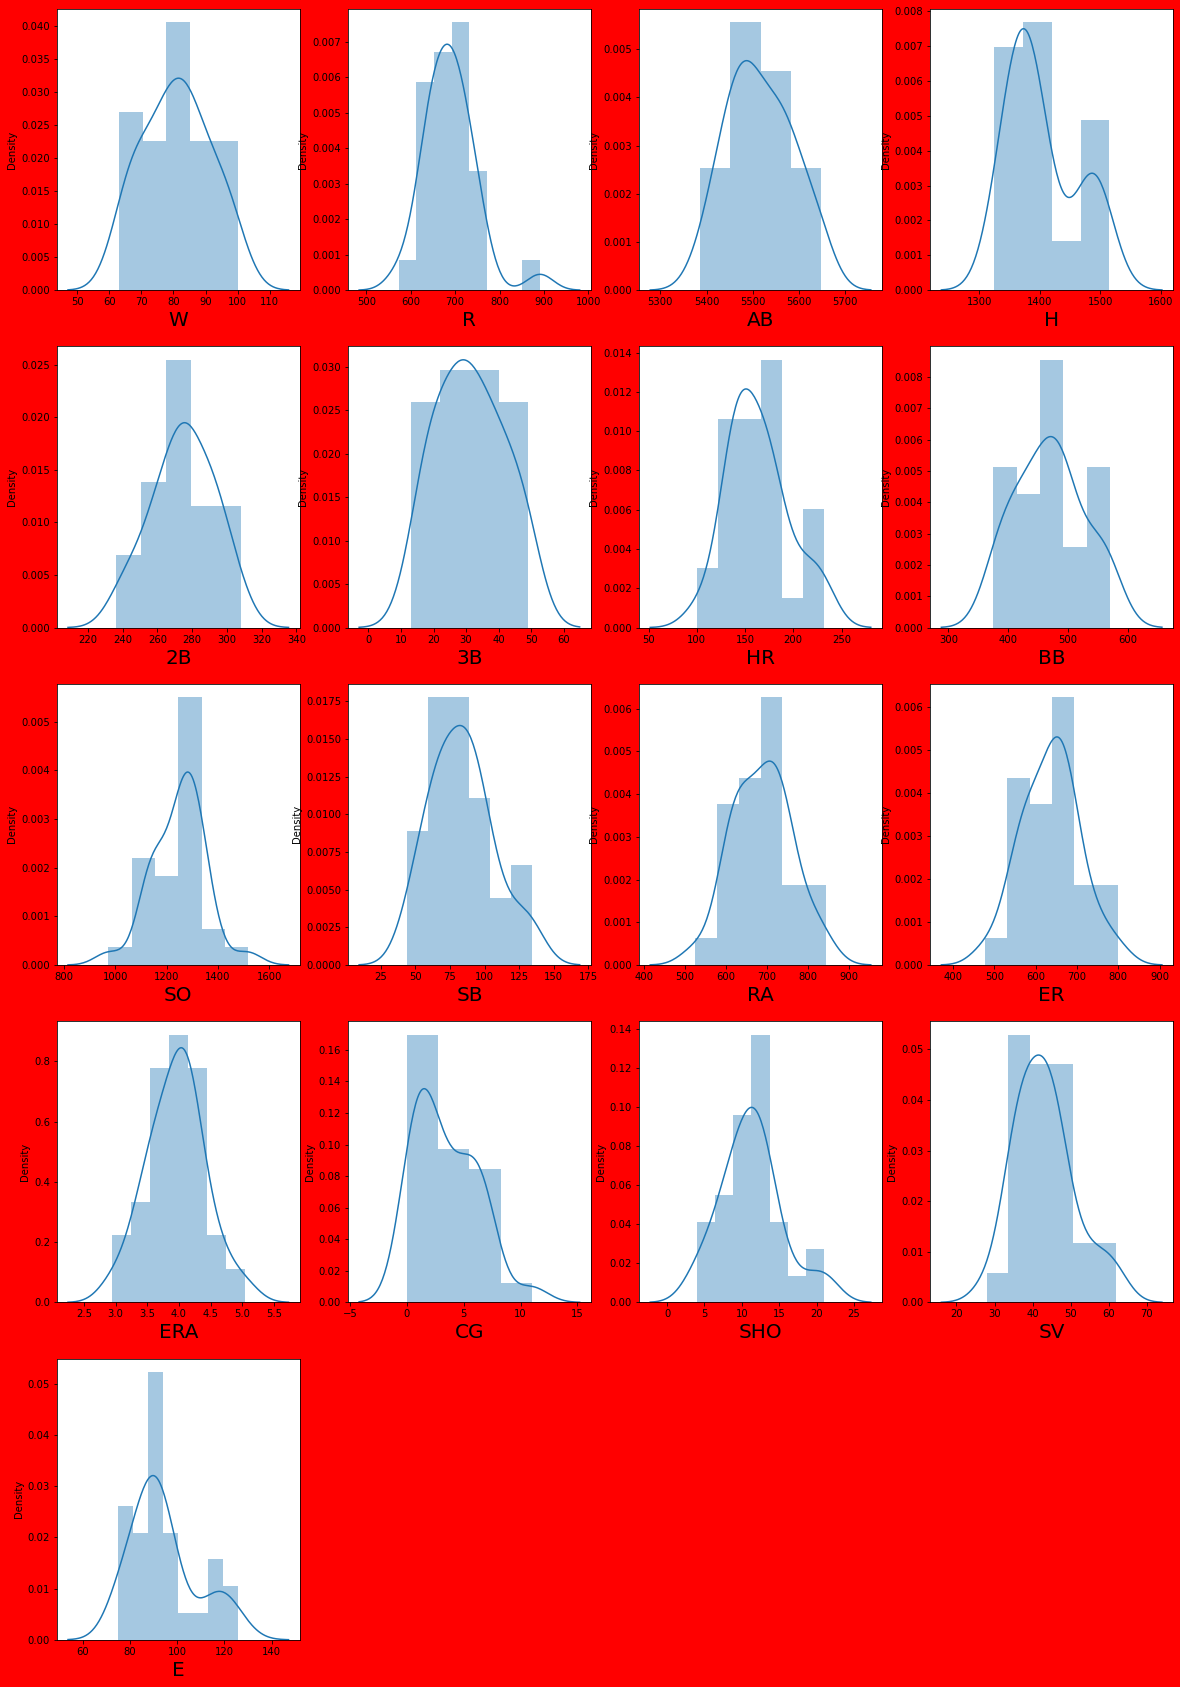

In [389]:
plt.figure(figsize=(20,30),facecolor='red')
plotnumber=1
for column in data:
    if plotnumber<=20:
        ax=plt.subplot(5,4,plotnumber)
        sns.distplot(data[column])
        plt.xlabel(column,fontsize=20)
        
    plotnumber+=1
plt.show()

From above graph it can be seen that maximum data is in normalised form,only some graph are showing outliers that are R,H,E,SHO

SPLITING THE DATA SET INTO FEATURES AND LABEL

In [390]:
y=data['W']
X=data.drop(columns=['W'])

In [391]:
X.head()

,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
0,724,5575,1497,300,42,139,383,973,104,641,601,3.73,2,8,56,88
1,696,5467,1349,277,44,156,439,1264,70,700,653,4.07,2,12,45,86
2,669,5439,1395,303,29,141,533,1157,86,640,584,3.67,11,10,38,79
3,622,5533,1381,260,27,136,404,1231,68,701,643,3.98,7,9,37,101
4,689,5605,1515,289,49,151,455,1259,83,803,746,4.64,7,12,35,86


PLOTING THE HEAT MAP AND APPLYING THE CORELATION FUNCATION TO FIND THE RELATIONSHIIP BETWEEN FEATURES AND LABEL

In [393]:
corr=data.corr()
corr

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
W,1.000000,0.430751,-0.087947,0.037612,0.427797,-0.251118,0.307407,0.484342,0.111850,-0.157234,-0.812952,-0.809435,-0.819600,0.080533,0.471805,0.666530,-0.089485
R,0.430751,1.000000,0.319464,0.482856,0.560084,-0.070072,0.671283,0.402452,-0.054726,0.081367,-0.041623,-0.041245,-0.049281,0.232042,-0.103274,-0.096380,-0.023262
AB,-0.087947,0.319464,1.000000,0.739122,0.453370,0.435422,-0.066983,-0.136414,-0.106022,0.372618,0.316010,0.309686,0.255551,-0.080876,-0.197321,-0.106367,0.316743
H,0.037612,0.482856,0.739122,1.000000,0.566847,0.478694,-0.090855,-0.118281,-0.398830,0.413444,0.224324,0.252489,0.231172,0.147955,-0.145559,-0.130371,-0.033173
2B,0.427797,0.560084,0.453370,0.566847,1.000000,0.220490,0.056292,0.302700,-0.150752,0.195027,-0.218160,-0.235531,-0.254854,0.306675,0.057998,0.171576,0.105754
3B,-0.251118,-0.070072,0.435422,0.478694,0.220490,1.000000,-0.430915,-0.454949,-0.141196,0.457437,0.314125,0.340225,0.330951,-0.065898,-0.041396,-0.142370,0.126678
HR,0.307407,0.671283,-0.066983,-0.090855,0.056292,-0.430915,1.000000,0.425691,0.359923,-0.136567,-0.103903,-0.085922,-0.090917,0.156502,-0.019119,-0.028540,-0.207597
BB,0.484342,0.402452,-0.136414,-0.118281,0.302700,-0.454949,0.425691,1.000000,0.233652,-0.098347,-0.416445,-0.452663,-0.459832,0.462478,0.426004,0.099445,-0.075685
SO,0.111850,-0.054726,-0.106022,-0.398830,-0.150752,-0.141196,0.359923,0.233652,1.000000,0.030968,-0.129745,-0.161612,-0.180368,-0.093418,0.237721,0.126297,0.155133
SB,-0.157234,0.081367,0.372618,0.413444,0.195027,0.457437,-0.136567,-0.098347,0.030968,1.000000,0.132290,0.143068,0.126063,-0.020783,-0.106563,-0.183418,0.079149


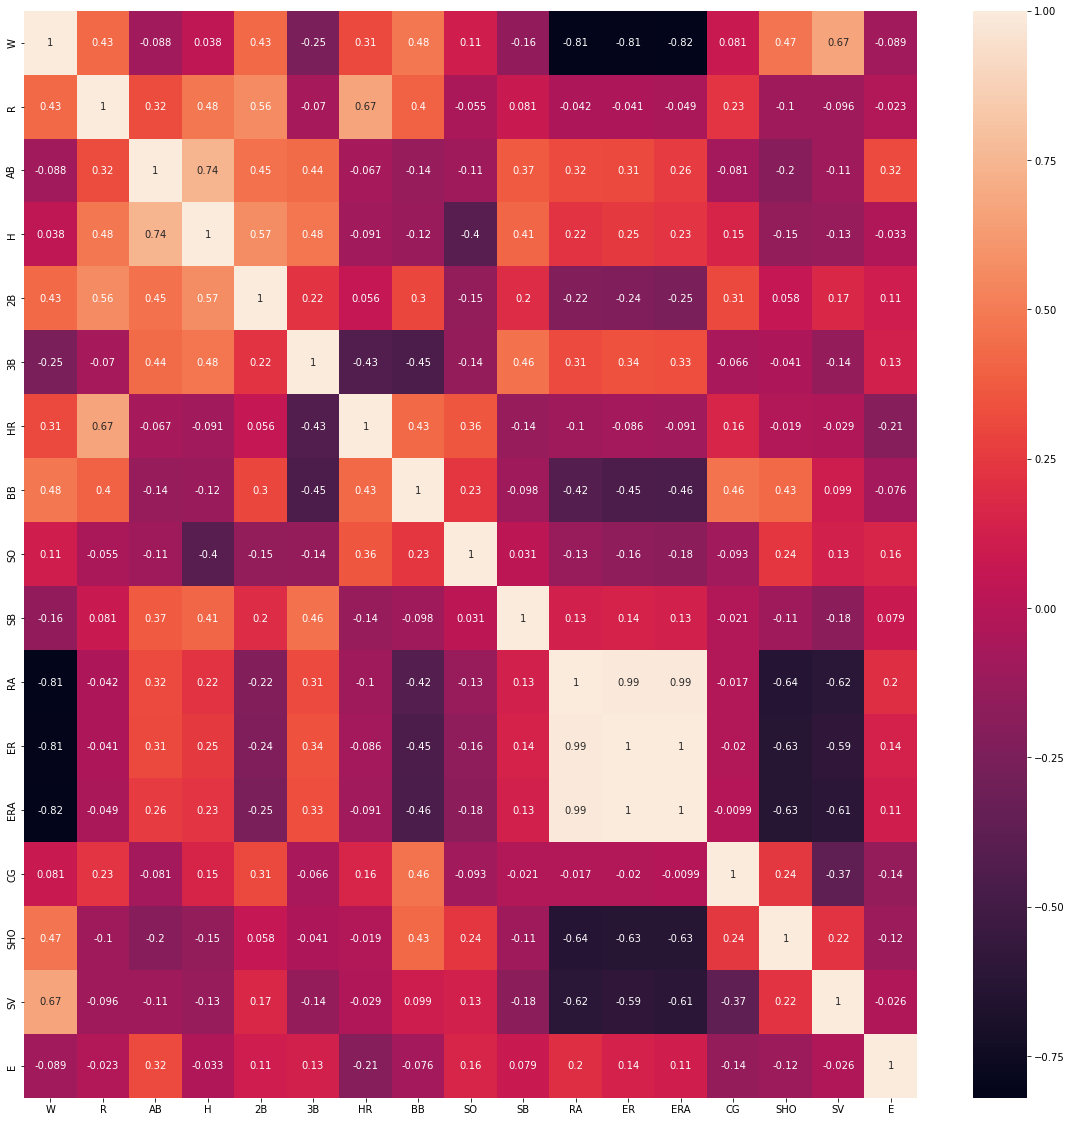

In [394]:
plt.figure(figsize=(20,20))

sns.heatmap(corr,annot=True)
plt.show()

In [395]:
data=data.drop(['ER'],1)

In [396]:
data=data.drop(['RA'],1)

In [397]:
data.head()

,W,R,AB,H,2B,3B,HR,BB,SO,SB,ERA,CG,SHO,SV,E
0,95,724,5575,1497,300,42,139,383,973,104,3.73,2,8,56,88
1,83,696,5467,1349,277,44,156,439,1264,70,4.07,2,12,45,86
2,81,669,5439,1395,303,29,141,533,1157,86,3.67,11,10,38,79
3,76,622,5533,1381,260,27,136,404,1231,68,3.98,7,9,37,101
4,74,689,5605,1515,289,49,151,455,1259,83,4.64,7,12,35,86


RELATIONSHIP BETWEEN FEATURES AND LABEL CANNOT BE SEEN VERY CLEAR FROM ABOVE GRAPH

BOX PLOT ON THE DATA SET

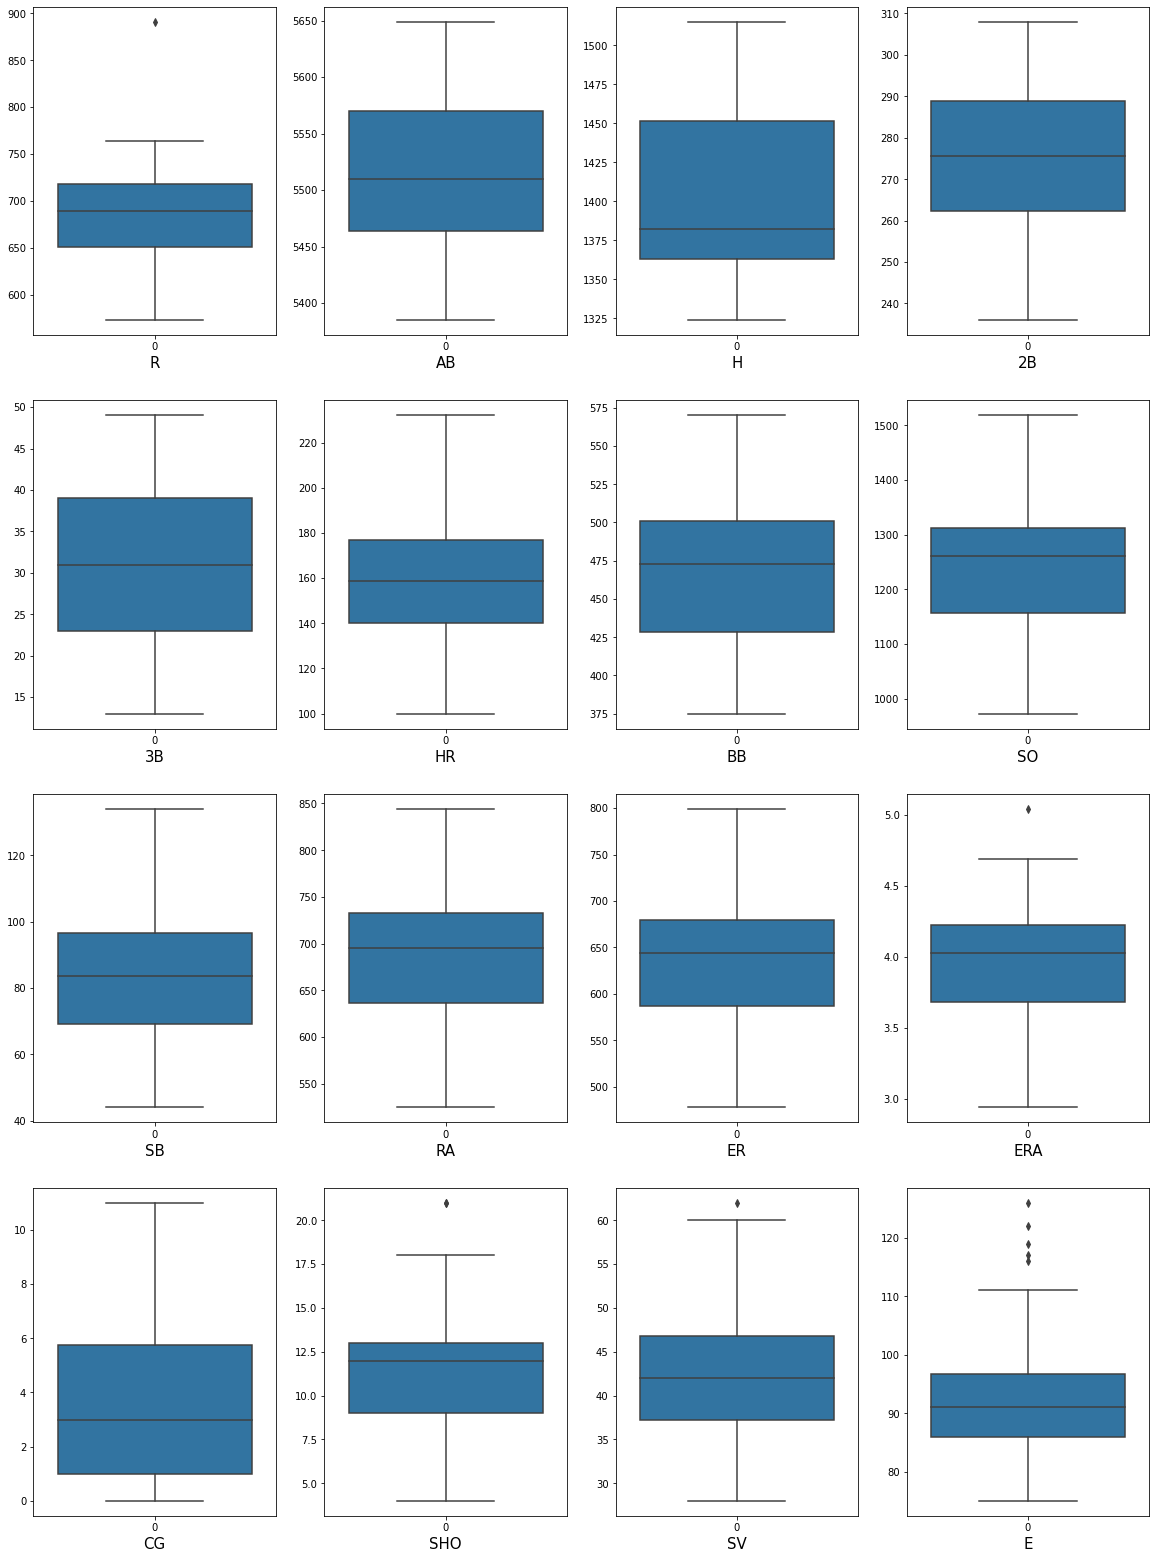

In [398]:
plt.figure(figsize=(20,35))
plotnumber=1
for column in X:
    if plotnumber<=20:
        plt.subplot(5,4,plotnumber)
        ax=sns.boxplot(data=X[column])
        plt.xlabel(column,fontsize=15)
        
    plotnumber+=1
plt.show()

In [399]:
data.skew()

W      0.047089
R      1.200786
AB     0.183437
H      0.670254
2B    -0.230650
3B     0.129502
HR     0.516441
BB     0.158498
SO    -0.156065
SB     0.479893
ERA    0.053331
CG     0.736845
SHO    0.565790
SV     0.657524
E      0.890132
dtype: float64

From boxplot we can see their are outlier present but these cannot be droped through iqr because dataset is very small and after droping some row very less amount of data remains. 

# DATA STANDARDIZATION APPLYING STANDARD SCALER 

In [400]:
scaler=StandardScaler()
X_scaled=scaler.fit_transform(X)


In [401]:
x_train,x_test,y_train,y_test=train_test_split(X_scaled,y,test_size=.25,random_state=49)
y_train.head()

19    64
11    86
1     83
6     87
29    68
Name: W, dtype: int64

# APPLYING LINEAR REGRESSION 

After analysis of data set it is seen that label is in continious form so it is regression problem,in regression i have choosen linear regression

In [402]:
regression=LinearRegression()
regression.fit(x_train,y_train)

LinearRegression()

In [403]:
regression.score(x_train,y_train)

0.9878242701764895

In [404]:
regression.score(x_test,y_test)

-0.02168745705760422

In [405]:
y_pred=regression.predict(x_test)

In [406]:
y_pred

array([101.04826742,  86.0586452 ,  94.0250781 ,  62.23857867,
        79.89077891, 103.63788926,  80.3896804 ,  82.22446539])

APPLYING ADA BOOST ALGORITHM

In [407]:
from sklearn.ensemble import AdaBoostRegressor

In [408]:
ada=AdaBoostRegressor()

In [409]:
ada.fit(x_train,y_train)

AdaBoostRegressor()

In [410]:
y_pred1=ada.predict(x_train)

In [411]:
from sklearn import metrics

In [412]:
accuracy=metrics.r2_score(y_train,y_pred1)
accuracy

0.9871910615330168

In [413]:
y_test_pred=ada.predict(x_test)

In [414]:
accuracy=metrics.r2_score(y_test,y_test_pred)
accuracy

0.4575122510687104

# regularization

#Applying Lasso cv 

In [415]:
from sklearn.linear_model import Ridge,Lasso,RidgeCV,LassoCV

In [416]:
lasscv=LassoCV(alphas=None,max_iter=100,normalize=True)
lasscv.fit(x_train,y_train)

LassoCV(max_iter=100, normalize=True)

In [417]:
alpha=lasscv.alpha_
alpha

0.2810981263100391

In [418]:
lasso_reg=Lasso(alpha)
lasso_reg.fit(x_train,y_train)

Lasso(alpha=0.2810981263100391)

In [419]:
y_pred2=lasso_reg.predict(x_test)
y_pred2

array([78.95119721, 81.84929588, 93.95491486, 64.19314524, 72.65476384,
       97.34053864, 81.69474959, 80.30354526])

In [420]:
y_test

14     68
9      78
16     98
24     63
28     74
15    100
27     79
7      81
Name: W, dtype: int64

In [422]:
lasso_reg.score(x_test,y_test)

0.8589000286884071

In [423]:
from sklearn.metrics import r2_score

In [424]:
y_pred2

array([78.95119721, 81.84929588, 93.95491486, 64.19314524, 72.65476384,
       97.34053864, 81.69474959, 80.30354526])

In [ ]:
#APPLYING R2 _SCORE

In [425]:
r2= r2_score(y_test,y_pred2)

In [426]:
r2

0.8589000286884071

# SAVING THE MODEL

In [427]:
import pickle

In [428]:
filename='winning'
pickle.dump(lasso_reg,open(filename,'wb'))
loaded_model=pickle.load(open(filename,'rb'))
